In [1]:
%matplotlib inline
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np

/Users/ryanchesler/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
train = pd.read_csv("../input/loan-default-prediction/train_v2.csv")
test = pd.read_csv("../input/loan-default-prediction/test_v2.csv")

/Users/ryanchesler/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/ryanchesler/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
target = train["loss"]

In [4]:
train = train.drop("loss", axis = 1)

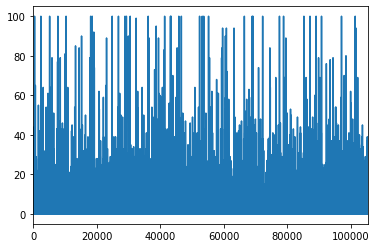

In [5]:
target.plot()

In [6]:
target.max()

100

In [7]:
target.min()

0

In [8]:
#majority is zeros
target.value_counts()

0      95688
2       1297
1       1145
3       1086
4       1038
5        685
6        573
7        565
8        487
10       316
9        312
11       234
12       211
13       188
14       157
15       140
16       129
17       123
18       100
20        83
21        76
19        73
22        72
23        48
24        48
27        46
25        45
100       35
28        35
29        33
       ...  
42         4
84         4
62         4
94         4
60         3
78         3
90         3
58         3
53         3
74         2
57         2
56         2
65         2
70         2
68         1
55         1
52         1
81         1
71         1
72         1
83         1
73         1
99         1
95         1
76         1
92         1
77         1
85         1
80         1
63         1
Name: loss, Length: 89, dtype: int64

In [9]:
bin_target = target > 0

In [10]:
train['f528-f527'] = train['f528'] - train['f527']
train['f528-f274'] = train['f528'] - train['f274']
train['f527-f274'] = train['f527'] - train['f274']
train['trial2'] = 5*train['f528'] - 4*train['f274'] - train['f527']
train['hasnull'] = np.zeros(len(train))
train['hasnull'][pd.isnull(train).any(axis=1)] = 1

/Users/ryanchesler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
test['f528-f527'] = test['f528'] - test['f527']
test['f528-f274'] = test['f528'] - test['f274']
test['f527-f274'] = test['f527'] - test['f274']
test['trial2'] = 5*test['f528'] - 4*test['f274'] - test['f527']
test['hasnull'] = np.zeros(len(test))
test['hasnull'][pd.isnull(test).any(axis=1)] = 1

/Users/ryanchesler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
tail_feature_300 = ['f607', 'f723', 'f453', 'f452', 'f604', 'f454', 'f457', 'f456', 'f459', 'f163', 'f162', 'f164', 'f752', 'f769', 'f502', 'f510', 'f455', 'f512', 'f762', 'f761', 'f283', 'f688', 'f206', 'f42', 'f750', 'f606', 'f681', 'f683', 'f684', 'f685', 'f686', 'f687', 'f608', 'f505', 'f504', 'f469', 'f610', 'f549', 'f616', 'f615', 'f507', 'f758', 'f759', 'f420', 'f119', 'f299', 'f503', 'f115', 'f501', 'f500', 'f293', 'f757', 'f291', 'f113', 'f215', 'f214', 'f511', 'f192', 'f692', 'f691', 'f690', 'f697', 'f506', 'f592', 'f595', 'f550', 'f537', 'f534', 'f94', 'f530', 'f531', 'f198', 'f625', 'f749', 'f748', 'f538', 'f539', 'f644', 'f435', 'f345', 'f109', 'f346', 'f472', 'f105', 'f104', 'f103', 'f439', 'hasnull', 'f95', 'f184', 'f182', 'f224', 'f497', 'f188', 'f583', 'f581', 'f580', 'f585', 'f584', 'f521', 'f28', 'f633', 'f730', 'f736', 'f482', 'f483', 'f480', 'f481', 'f486', 'f487', 'f484', 'f485', 'f400', 'f207', 'f285', 'f323', 'f130', 'f131', 'f515', 'f137', 'f527', 'f335', 'f232', 'f33', 'f36', 'f48', 'f678', 'f568', 'f125', 'f722', 'f720', 'f120', 'f123', 'f724', 'f728', 'f129', 'f747', 'f554', 'f555', 'f557', 'f419', 'f551', 'f552', 'f415', 'f414', 'f558', 'f559', 'f124', 'f753', 'f325', 'f89', 'f321', 'f85', 'f84', 'f242', 'f83', 'f190', 'f675', 'f627', 'f528', 'f770', 'f152', 'f718', 'f719', 'f158', 'f389', 'f714', 'f712', 'f713', 'f710', 'f711', 'f547', 'f546', 'f90', 'f544', 'f543', 'f542', 'f541', 'f540', 'f460', 'f461', 'f99', 'f464', 'f466', 'f548', 'f317', 'f315', 'f252', 'f495', 'f494', 'f18', 'f496', 'f491', 'f490', 'f493', 'f492', 'f576', 'f709', 'f708', 'f387', 'f329', 'f347', 'f8', 'f703', 'f705', 'f704', 'f707', 'f706', 'f572', 'f570', 'f571', 'f262', 'f577', 'f574', 'f575', 'f114', 'f578', 'f579', 'f477', 'f476', 'f268', 'f470', 'f309', 'f666', 'f307', 'f301', 'f475', 'f78', 'f62', 'f396', 'f446', 'f447', 'f445', 'f174', 'f172', 'f173', 'f449', 'f569', 'f274', 'f565', 'f564', 'f567', 'f777', 'f561', 'f560', 'f772', 'f562', 'f52', 'f467', 'f93', 'f372', 'f355', 'f284', 'f754', 'f77']
train = train.drop(tail_feature_300, axis = 1)
test = test.drop(tail_feature_300, axis = 1)

In [13]:
#columns with weird dtypes or missing values. Dropping for now
drop_cols = "f138 f276 f277 f338 f390 f391 f626 f695 f698".split()
train = train.drop(drop_cols, axis = 1)
test = test.drop(drop_cols, axis = 1)

In [24]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, mean_absolute_error

In [25]:
train["binary_target"] = bin_target

In [16]:
train = train.set_index("id")
test = test.set_index("id")

In [18]:
train.to_csv("binary_dataset.csv")
test.to_csv("binary_testset.csv")

In [27]:
train = pd.read_csv("./binary_dataset.csv")
test = pd.read_csv("./binary_testset.csv")
bin_target = train["binary_target"]
train = train.drop("binary_target", axis = 1)

In [28]:
num_folds = 5
kf = KFold(n_splits = num_folds, shuffle = True, random_state = 42)
bin_oof = np.zeros(shape = train.shape[0])
test_oof = np.zeros(shape = test.shape[0])
for train_index, val_index in kf.split(train):
    train_X = train.iloc[train_index]
    val_X = train.iloc[val_index]
    train_y = bin_target.iloc[train_index]
    val_y = bin_target.iloc[val_index]
    lgb_train = lgb.Dataset(train_X, train_y)
    lgb_eval = lgb.Dataset(val_X, val_y)
    params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'verbose': 5
    }
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets=lgb_eval,
               early_stopping_rounds=20,
               verbose_eval = 5)

    y_pred = gbm.predict(val_X, num_iteration=gbm.best_iteration)
    y_test_pred = gbm.predict(test, num_iteration=gbm.best_iteration)
    print(accuracy_score(y_pred>.5, val_y))
    print(f1_score(y_pred>.5, val_y))
    print(confusion_matrix(val_y, y_pred>.5))
    bin_oof[val_index] = y_pred
    test_oof += y_test_pred/num_folds

Training until validation scores don't improve for 20 rounds.
[5]	valid_0's binary_logloss: 0.189892
[10]	valid_0's binary_logloss: 0.140868
[15]	valid_0's binary_logloss: 0.110643
[20]	valid_0's binary_logloss: 0.0895157
[25]	valid_0's binary_logloss: 0.0748752
[30]	valid_0's binary_logloss: 0.0640868
[35]	valid_0's binary_logloss: 0.0559505
[40]	valid_0's binary_logloss: 0.0498724
[45]	valid_0's binary_logloss: 0.0453693
[50]	valid_0's binary_logloss: 0.0416978
[55]	valid_0's binary_logloss: 0.0387297
[60]	valid_0's binary_logloss: 0.0364797
[65]	valid_0's binary_logloss: 0.0347304
[70]	valid_0's binary_logloss: 0.0332671
[75]	valid_0's binary_logloss: 0.0321896
[80]	valid_0's binary_logloss: 0.0313455
[85]	valid_0's binary_logloss: 0.0303381
[90]	valid_0's binary_logloss: 0.0297132
[95]	valid_0's binary_logloss: 0.0292054
[100]	valid_0's binary_logloss: 0.0287018
[105]	valid_0's binary_logloss: 0.0282356
[110]	valid_0's binary_logloss: 0.0279081
[115]	valid_0's binary_logloss: 0.027

[290]	valid_0's binary_logloss: 0.0259664
[295]	valid_0's binary_logloss: 0.0258628
[300]	valid_0's binary_logloss: 0.0258762
[305]	valid_0's binary_logloss: 0.0259258
[310]	valid_0's binary_logloss: 0.0259324
[315]	valid_0's binary_logloss: 0.0259078
Early stopping, best iteration is:
[297]	valid_0's binary_logloss: 0.0258558
0.9899497487437185
0.9467604218985435
[[18997   177]
 [   35  1885]]
Training until validation scores don't improve for 20 rounds.
[5]	valid_0's binary_logloss: 0.191282
[10]	valid_0's binary_logloss: 0.14202
[15]	valid_0's binary_logloss: 0.111598
[20]	valid_0's binary_logloss: 0.090504
[25]	valid_0's binary_logloss: 0.0756192
[30]	valid_0's binary_logloss: 0.0646607
[35]	valid_0's binary_logloss: 0.0564779
[40]	valid_0's binary_logloss: 0.0505426
[45]	valid_0's binary_logloss: 0.0461163
[50]	valid_0's binary_logloss: 0.0424299
[55]	valid_0's binary_logloss: 0.0395317
[60]	valid_0's binary_logloss: 0.0372701
[65]	valid_0's binary_logloss: 0.0356094
[70]	valid_0'

In [34]:
from sklearn.metrics import f1_score
f1_score(bin_target, bin_oof > .5)

0.94982311026957

In [21]:
#error on negative predictions
neg_loss = mean_absolute_error(np.zeros(shape = (train[bin_oof< .5].shape[0])), target[bin_oof< .5])

In [22]:
#error from positive predictions. Not a good metric, just a sanity check
mean_absolute_error(np.zeros(shape = (train[bin_oof> .5].shape[0])), target[bin_oof> .5])

8.058331713007972

In [24]:
pos_train = train.iloc[bin_oof>.5]
pos_test = test.iloc[test_oof>.5]

In [25]:
reg_target = np.log1p(target.iloc[bin_oof>.5])

In [26]:
kf = KFold(n_splits = num_folds, shuffle = True, random_state = 42)
oof = np.zeros(shape = pos_train.shape[0])
test_reg_oof = np.zeros(shape = pos_test.shape[0])
pos_loss = 0
for train_index, val_index in kf.split(pos_train):
    train_X = pos_train.iloc[train_index]
    val_X = pos_train.iloc[val_index]
    train_y = reg_target.iloc[train_index]
    val_y = reg_target.iloc[val_index]
    lgb_train = lgb.Dataset(train_X, train_y)
    lgb_eval = lgb.Dataset(val_X, val_y)
    params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'mae'},
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.9,
            'bagging_freq': 5,
            'verbose': 0
            }
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets=lgb_eval,
               early_stopping_rounds=20,
               verbose_eval = 5)

    y_pred = np.expm1(gbm.predict(val_X, num_iteration=gbm.best_iteration))
    y_test_pred = np.expm1(gbm.predict(pos_test, num_iteration=gbm.best_iteration))
    pos_loss += mean_absolute_error(y_pred, np.expm1(val_y))/num_folds
    print(mean_absolute_error(y_pred, np.expm1(val_y)))
    oof[val_index] = y_pred
    test_reg_oof += y_test_pred/num_folds

Training until validation scores don't improve for 20 rounds.
[5]	valid_0's l1: 0.674162
[10]	valid_0's l1: 0.6321
[15]	valid_0's l1: 0.603308
[20]	valid_0's l1: 0.580315
[25]	valid_0's l1: 0.56377
[30]	valid_0's l1: 0.550456
[35]	valid_0's l1: 0.540374
[40]	valid_0's l1: 0.533265
[45]	valid_0's l1: 0.527039
[50]	valid_0's l1: 0.522205
[55]	valid_0's l1: 0.519292
[60]	valid_0's l1: 0.516599
[65]	valid_0's l1: 0.513494
[70]	valid_0's l1: 0.510556
[75]	valid_0's l1: 0.508645
[80]	valid_0's l1: 0.505869
[85]	valid_0's l1: 0.504393
[90]	valid_0's l1: 0.502709
[95]	valid_0's l1: 0.502116
[100]	valid_0's l1: 0.501168
[105]	valid_0's l1: 0.500414
[110]	valid_0's l1: 0.498975
[115]	valid_0's l1: 0.497649
[120]	valid_0's l1: 0.4968
[125]	valid_0's l1: 0.495791
[130]	valid_0's l1: 0.495026
[135]	valid_0's l1: 0.494072
[140]	valid_0's l1: 0.493945
[145]	valid_0's l1: 0.493354
[150]	valid_0's l1: 0.492527
[155]	valid_0's l1: 0.491789
[160]	valid_0's l1: 0.491336
[165]	valid_0's l1: 0.490783
[170]	

[205]	valid_0's l1: 0.499402
Early stopping, best iteration is:
[186]	valid_0's l1: 0.499332
4.354860977147143


In [27]:
print(gbm.feature_importance())
print(gbm.feature_name())

[ 31  15  41  19   5   3  19   7   8  25  43   9   4  11   4   5   4   5
   9   5   7  16  11   3   3   2  10   7   0   0   0   0  10   4  17   4
  14   6  14  20   9   6   6   2   6  10   6  17   1  12  12  11   8  14
   4   4 209  23   9  10  20  13   8   0  19  18   9   9   5  11   9   0
   1  42  10  10   0   0  16   7   3   5   0   0   2   3  10   5   1   0
  45   9   2   0   0  18  10  18   9   6  10  11   8  35  13   8   6   2
   4   3   9  16  10   5   3   0   0   0  12   6  11   1   0   0   3  12
   3   3   0   0   0   1  14  12   8   2   3   0   0  16  19   8   2   0
   0   0   7  10  16  12  34   4   8  13   8   7  11  15   8   1   6  20
   6   4  11   0   8   4   2   0  17  25  21   3   0   5   0   0   0   1
   2   6   5   1   5   1   0   0   0   3   6   9  20   7   0   0   0   1
  18   7  11   8   6   0   0   0   7   9  33  26  27  13  21  11  16  14
   9   6   3   8  15  12  14   1   0   0   1   9   3   1   0   0   0   3
   7   3   1   0   5  12   5   2   0   0   9   4   

In [28]:
print((pos_loss*len(bin_oof[bin_oof>.5])+neg_loss*len(bin_oof[bin_oof<.5]))/len(bin_oof))

0.4387247026967302


In [29]:
test_oof[test_oof>.5] = test_reg_oof

In [30]:
sub = pd.read_csv("../input/loan-default-prediction/sampleSubmission.csv")

In [31]:
sub["loss"] = test_oof

In [32]:
sub.to_csv("second_sub.csv", index = False)

In [34]:
reg_target = np.log1p(target)

In [35]:
#retrying as a single pipeline
num_folds = 5
kf = KFold(n_splits = num_folds, shuffle = True, random_state = 42)
oof = np.zeros(shape = train.shape[0])
test_reg_oof = np.zeros(shape = test.shape[0])
loss = 0
for train_index, val_index in kf.split(train):
    train_X = train.iloc[train_index]
    val_X = train.iloc[val_index]
    train_y = reg_target.iloc[train_index]
    val_y = reg_target.iloc[val_index]
    lgb_train = lgb.Dataset(train_X, train_y)
    lgb_eval = lgb.Dataset(val_X, val_y)
    params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'mae'},
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.9,
            'bagging_freq': 5,
            'verbose': 0
            }
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets=lgb_eval,
               early_stopping_rounds=20,
               verbose_eval = 5)

    y_pred = np.expm1(gbm.predict(val_X, num_iteration=gbm.best_iteration))
    y_test_pred = np.expm1(gbm.predict(test, num_iteration=gbm.best_iteration))
    loss += mean_absolute_error(y_pred, np.expm1(val_y))/num_folds
    print(mean_absolute_error(y_pred, np.expm1(val_y)))
    oof[val_index] = y_pred
    test_reg_oof += y_test_pred/num_folds

Training until validation scores don't improve for 20 rounds.
[5]	valid_0's l1: 0.256465
[10]	valid_0's l1: 0.210177
[15]	valid_0's l1: 0.175535
[20]	valid_0's l1: 0.148614
[25]	valid_0's l1: 0.128892
[30]	valid_0's l1: 0.115208
[35]	valid_0's l1: 0.104687
[40]	valid_0's l1: 0.0966735
[45]	valid_0's l1: 0.0909567
[50]	valid_0's l1: 0.0860399
[55]	valid_0's l1: 0.0827513
[60]	valid_0's l1: 0.0799957
[65]	valid_0's l1: 0.0778195
[70]	valid_0's l1: 0.076162
[75]	valid_0's l1: 0.0747058
[80]	valid_0's l1: 0.0737627
[85]	valid_0's l1: 0.0730006
[90]	valid_0's l1: 0.07219
[95]	valid_0's l1: 0.071638
[100]	valid_0's l1: 0.0711864
[105]	valid_0's l1: 0.0709023
[110]	valid_0's l1: 0.0704653
[115]	valid_0's l1: 0.0702014
[120]	valid_0's l1: 0.0699518
[125]	valid_0's l1: 0.0698323
[130]	valid_0's l1: 0.069557
[135]	valid_0's l1: 0.0694602
[140]	valid_0's l1: 0.0694384
[145]	valid_0's l1: 0.0695719
[150]	valid_0's l1: 0.0695107
[155]	valid_0's l1: 0.0694418
[160]	valid_0's l1: 0.0693728
[165]	vali

0.46528949999426417


In [40]:
test_reg_oof[test_reg_oof < 0] = 0

In [41]:
sub = pd.read_csv("../input/loan-default-prediction/sampleSubmission.csv")

sub["loss"] = test_reg_oof

sub.to_csv("full_pipe_sub_filtered_negs.csv", index = False)